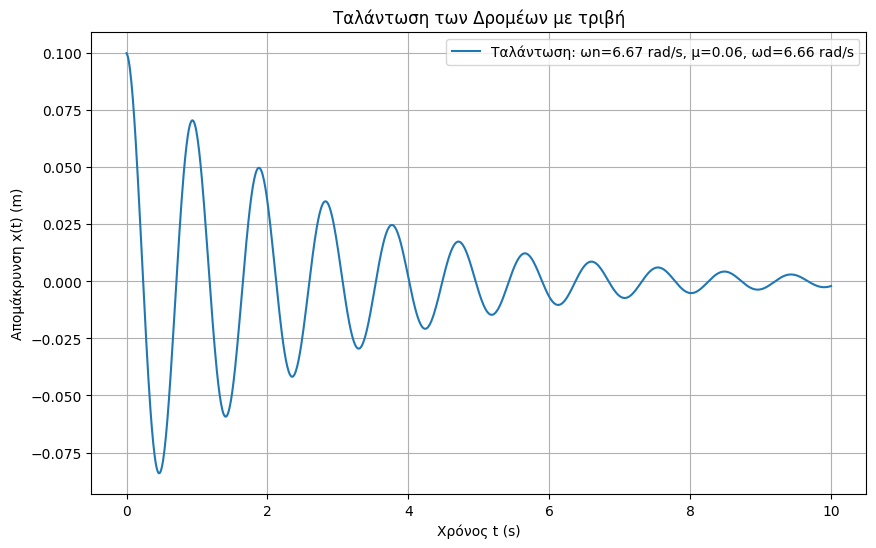

In [14]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.135  # Μάζα των δρομέων σε kg
D = 3.0  # Σταθερά των ελατηρίων σε N/m
b = 0.1  # Συντελεστής απόσβεσης σε kg/s

omega_n = np.sqrt(2 * D / m)
zeta = b / (2 * m * omega_n)
omega_d = omega_n * np.sqrt(1 - zeta**2)

t = np.linspace(0, 10, 1000)  

# Αρχικές συνθήκες
X0 = 0.1 
phi = 0  # Αρχική φάση

x_t = X0 * np.exp(-zeta * omega_n * t) * np.cos(omega_d * t + phi)

plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label=f'Ταλάντωση: ωn={omega_n:.2f} rad/s, μ={zeta:.2f}, ωd={omega_d:.2f} rad/s')
plt.title('Ταλάντωση των Δρομέων με τριβή')
plt.xlabel('Χρόνος t (s)')
plt.ylabel('Απομάκρυνση x(t) (m)')
plt.grid(True)
plt.legend()
plt.show()

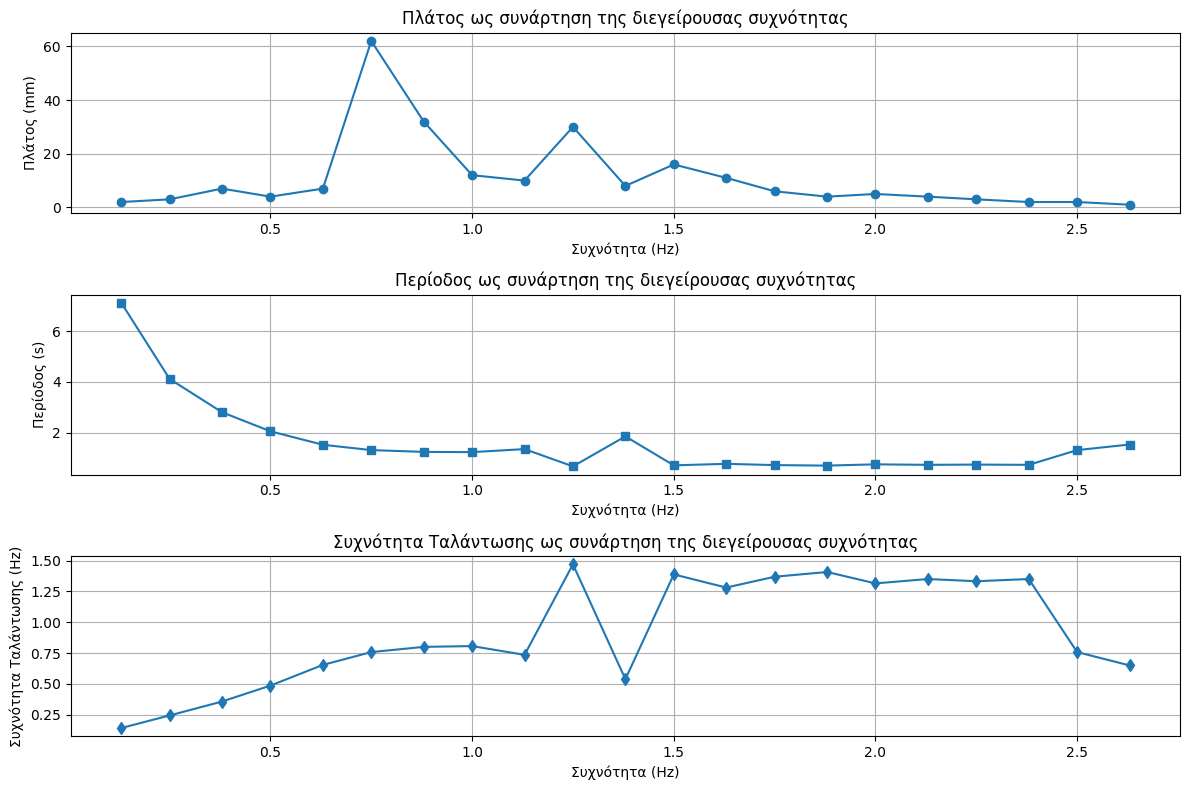

In [2]:
import matplotlib.pyplot as plt
import numpy as np

frequencies = np.array([0.13, 0.25, 0.38, 0.50, 0.63, 0.75, 0.88, 1.00, 1.13, 1.25, 1.38, 1.50, 1.63, 1.75, 1.88, 2.00, 2.13, 2.25, 2.38, 2.50, 2.63])
amplitudes = np.array([2, 3, 7, 4, 7, 62, 32, 12, 10, 30, 8, 16, 11, 6, 4, 5, 4, 3, 2, 2, 1])
periods = np.array([7.12, 4.12, 2.81, 2.06, 1.53, 1.32, 1.25, 1.24, 1.36, 0.68, 1.86, 0.72, 0.78, 0.73, 0.71, 0.76, 0.74, 0.75, 0.74, 1.32, 1.54])

oscillation_frequencies = 1 / periods

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(frequencies, amplitudes, marker='o', linestyle='-')
plt.title('Πλάτος ως συνάρτηση της διεγείρουσας συχνότητας')
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πλάτος (mm)')
plt.grid(True)



plt.subplot(3, 1, 2)
plt.plot(frequencies, periods, marker='s', linestyle='-')
plt.title('Περίοδος ως συνάρτηση της διεγείρουσας συχνότητας')
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Περίοδος (s)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(frequencies, oscillation_frequencies, marker='d', linestyle='-')
plt.title('Συχνότητα Ταλάντωσης ως συνάρτηση της διεγείρουσας συχνότητας')
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Συχνότητα Ταλάντωσης (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
f1_prime = 0.1  # Hz
f2_prime = 0.08  # Hz
b = 0.1  # kg/s
m = 0.135  # kg

omega1_prime = 2 * np.pi * f1_prime
omega2_prime = 2 * np.pi * f2_prime

zeta1 = b / (2 * m * omega1_prime)
zeta2 = b / (2 * m * omega2_prime)

omega1_0 = omega1_prime / np.sqrt(1 - zeta1**2)
omega2_0 = omega2_prime / np.sqrt(1 - zeta2**2)

f1_0 = omega1_0 / (2 * np.pi)
f2_0 = omega2_0 / (2 * np.pi)

shift1 = ((f1_0 - f1_prime) / f1_prime) * 100
shift2 = ((f2_0 - f2_prime) / f2_prime) * 100

f1_0, f2_0, shift1, shift2

(0.12379369877715866,
 0.11832923281109617,
 23.79369877715866,
 47.911541013870206)

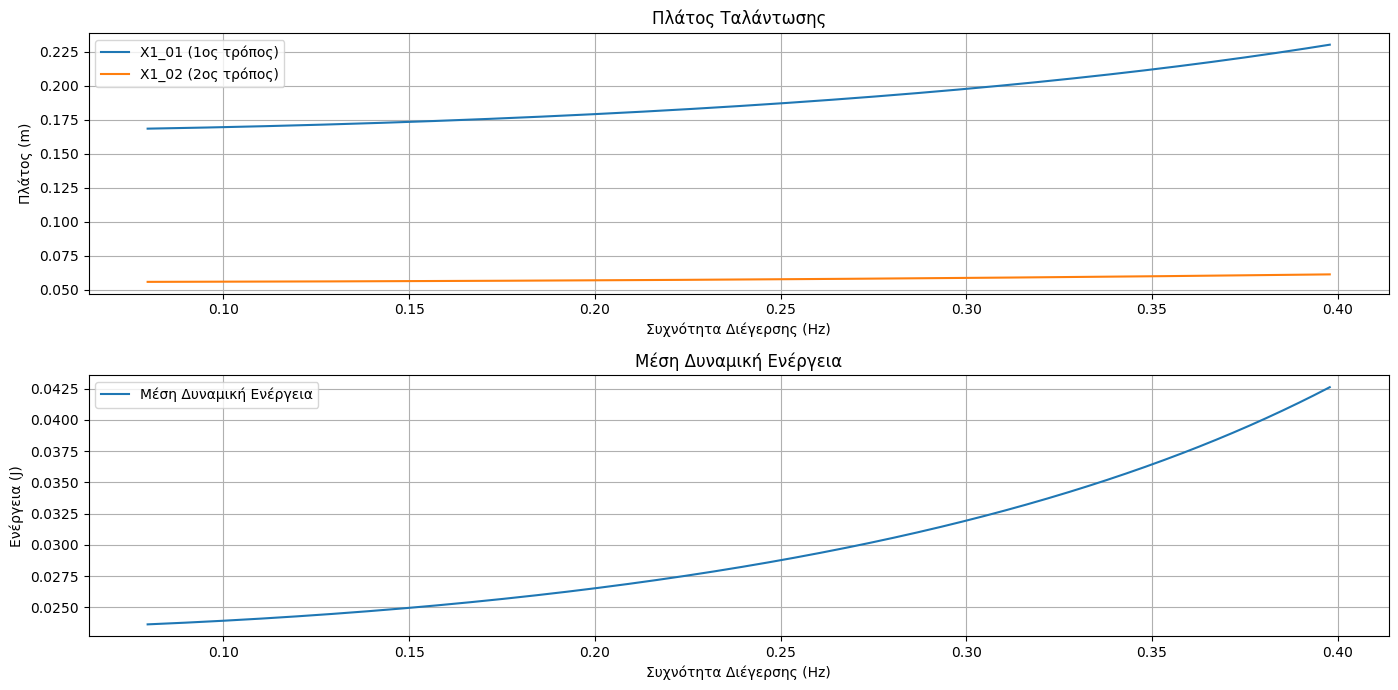

In [4]:
import numpy as np
import matplotlib.pyplot as plt

D = 3.0  # N/m
m = 0.135  # kg
b = 0.1  # kg/s
F0 = 1.0  # Ν 

# Συχνότητες συντονισμού
omega1 = np.sqrt(D / m)
omega2 = np.sqrt(3 * D / m)

# Διέγερσης
omega = np.linspace(0.5, 2.5, 500)

X1_01 = (F0 / (2 * m)) / np.sqrt((omega1**2 - omega**2)**2 + (b * omega / m)**2)
X1_02 = (F0 / (2 * m)) / np.sqrt((omega2**2 - omega**2)**2 + (b * omega / m)**2)

# Μέση Δυναμική Ενέργεια
E_dyn = (m * omega1**2 / 4) * (X1_01**2 + X1_02**2)

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(omega / (2 * np.pi), X1_01, label='X1_01 (1ος τρόπος)')
plt.plot(omega / (2 * np.pi), X1_02, label='X1_02 (2ος τρόπος)')
plt.title('Πλάτος Ταλάντωσης')
plt.xlabel('Συχνότητα Διέγερσης (Hz)')
plt.ylabel('Πλάτος (m)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(omega / (2 * np.pi), E_dyn, label='Μέση Δυναμική Ενέργεια')
plt.title('Μέση Δυναμική Ενέργεια')
plt.xlabel('Συχνότητα Διέγερσης (Hz)')
plt.ylabel('Ενέργεια (J)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

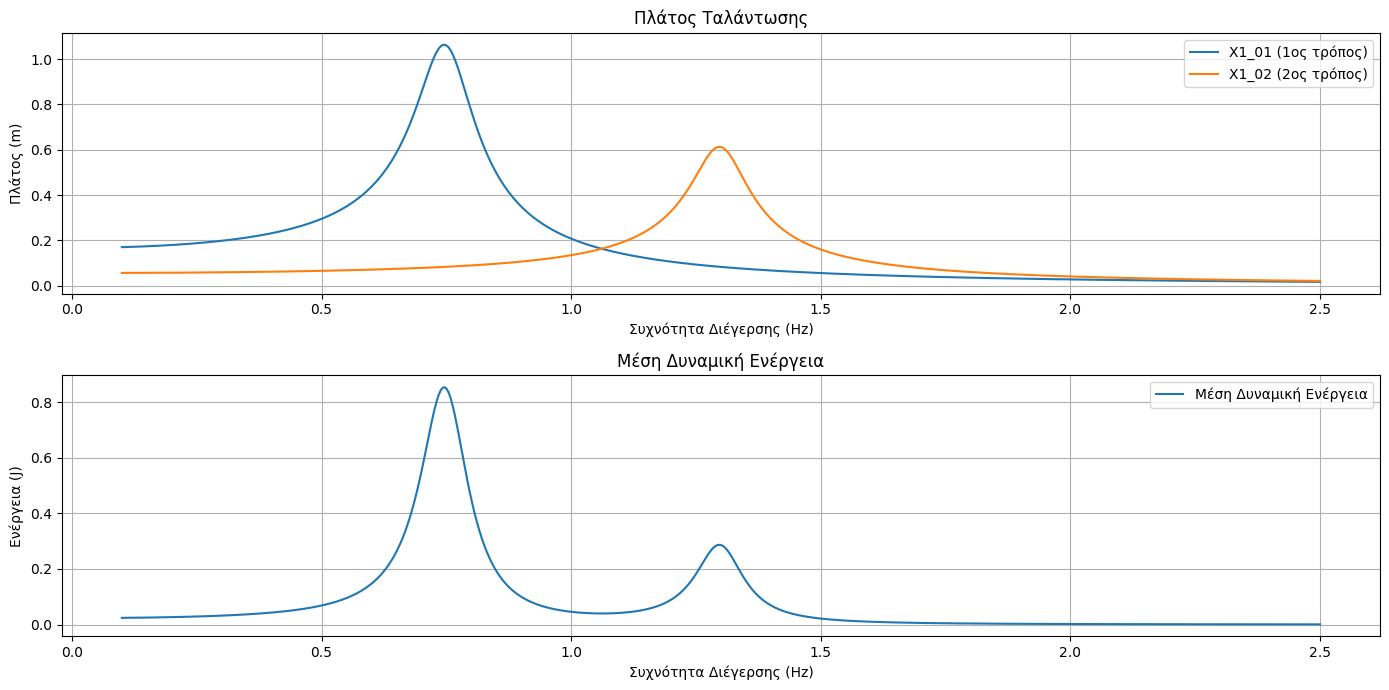

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 60  
X01_exp = np.array([19, 16, 10, 7, 6, 6, 5, 4, 3, 2, 1]) / 1000  # ομορροπής
X02_exp = np.array([16, 13, 9, 6, 6, 4, 4, 3, 2, 1, 1]) / 1000  #  αντίρροπης

D = 3.0  # N/m
m = 0.135  # kg
b = 0.1  # kg/s  
F0 = 1.0  # Ν (εκτίμηση)


omega1 = np.sqrt(D / m)
omega2 = np.sqrt(3 * D / m)


f = np.linspace(0.1, 2.5, 500)  # συχνότητες σε Hz
omega = 2 * np.pi * f  # συχνότητες σε rad/s

X1_01 = (F0 / (2 * m)) / np.sqrt((omega1**2 - omega**2)**2 + (b * omega / m)**2)
X1_02 = (F0 / (2 * m)) / np.sqrt((omega2**2 - omega**2)**2 + (b * omega / m)**2)

# Υπολογισμός της μέσης δυναμικής ενέργειας
E_dyn = (m * omega1**2 / 4) * (X1_01**2 + X1_02**2)


plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(f, X1_01, label='X1_01 (1ος τρόπος)')
plt.plot(f, X1_02, label='X1_02 (2ος τρόπος)')
plt.title('Πλάτος Ταλάντωσης')
plt.xlabel('Συχνότητα Διέγερσης (Hz)')
plt.ylabel('Πλάτος (m)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(f, E_dyn, label='Μέση Δυναμική Ενέργεια')
plt.title('Μέση Δυναμική Ενέργεια')
plt.xlabel('Συχνότητα Διέγερσης (Hz)')
plt.ylabel('Ενέργεια (J)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


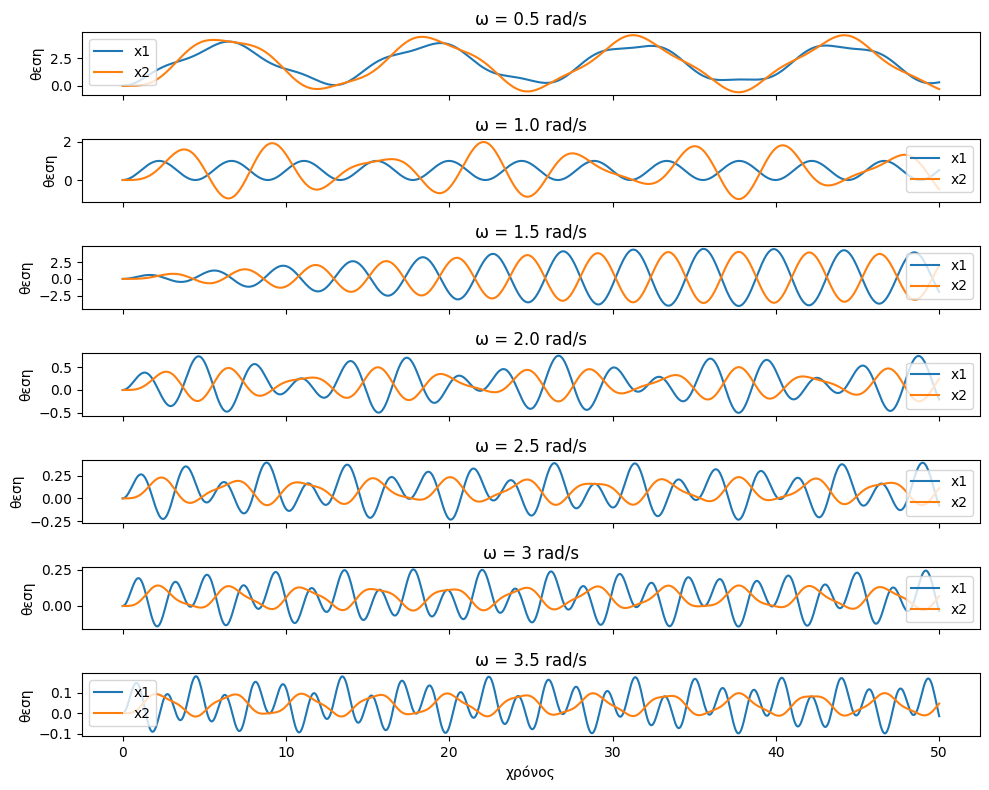

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  
k = 1.0  
F0 = 1.0  
omegas = [0.5, 1.0, 1.5, 2.0,2.5,3,3.5]  
t_span = (0, 50)  
initial_conditions = [0.0, 0.0, 0.0, 0.0]  

def equations(t, y, omega):
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = (-k * (x1 - x2) + F0 * np.cos(omega * t)) / m
    dx2dt = v2
    dv2dt = (-k * (x2 - x1)) / m
    return [dx1dt, dv1dt, dx2dt, dv2dt]

fig, axs = plt.subplots(len(omegas), 1, figsize=(10, 8), sharex=True)

for i, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    x1, v1, x2, v2 = sol.sol(t)
    axs[i].plot(t, x1, label='x1')
    axs[i].plot(t, x2, label='x2')
    axs[i].set_title(f'ω = {omega} rad/s')
    axs[i].legend()
    axs[i].set_ylabel('θεση')

axs[-1].set_xlabel('χρόνος')
plt.tight_layout()
plt.show()

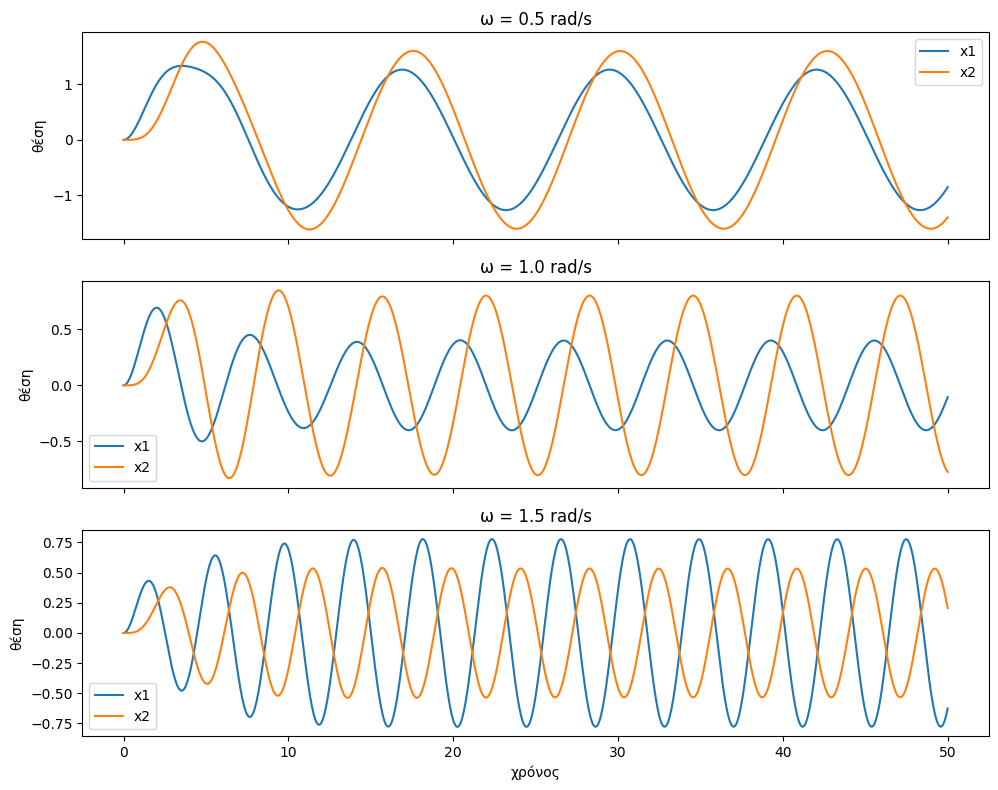

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0 
k = 1.0  
b = 0.5  
F0 = 1.0  
omegas = [0.5, 1.0, 1.5]  
t_span = (0, 50)  
initial_conditions = [0, 0, 0, 0]  

def equations(t, y, omega):
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = (-k * (x1 - x2) - b * v1 + F0 * np.cos(omega * t)) / m
    dx2dt = v2
    dv2dt = (-k * (x2 - x1) - b * v2) / m
    return [dx1dt, dv1dt, dx2dt, dv2dt]

fig, axs = plt.subplots(len(omegas), 1, figsize=(10, 8), sharex=True)

for i, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    x1, v1, x2, v2 = sol.sol(t)
    axs[i].plot(t, x1, label='x1')
    axs[i].plot(t, x2, label='x2')
    axs[i].set_title(f'ω = {omega} rad/s')
    axs[i].legend()
    axs[i].set_ylabel('θέση')

axs[-1].set_xlabel('χρόνος')
plt.tight_layout()
plt.show()

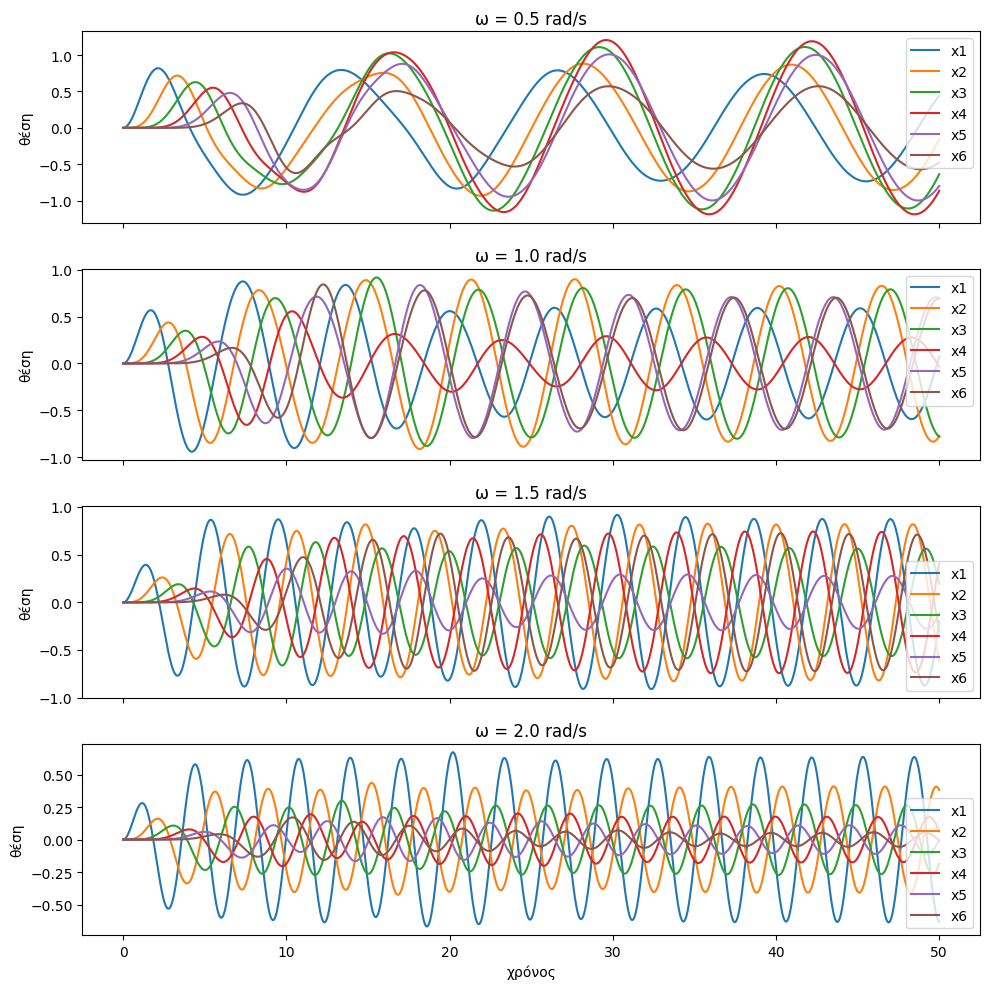

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  
k = 1.0  
b = 0.2  
F0 = 1.0  
omegas = [0.5, 1.0, 1.5, 2.0]  
t_span = (0, 50)  
initial_conditions = [0.0, 0.0] * 6  

def equations(t, y, omega):
    dydt = np.zeros_like(y)
    for i in range(6):
        x_i = y[2*i]
        v_i = y[2*i + 1]
        if i == 0:
            x_prev = 0  
        else:
            x_prev = y[2*(i-1)]
        
        if i == 5:
            x_next = 0  
        else:
            x_next = y[2*(i+1)]
        
        dydt[2*i] = v_i
        force = -k * (2 * x_i - x_prev - x_next) - b * v_i
        if i == 0:
            force += F0 * np.cos(omega * t)
        dydt[2*i + 1] = force / m
    return dydt

fig, axs = plt.subplots(len(omegas), 1, figsize=(10, 10), sharex=True)

for i, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    y = sol.sol(t)
    for j in range(6):
        axs[i].plot(t, y[2*j], label=f'x{j+1}')
    axs[i].set_title(f'ω = {omega} rad/s')
    axs[i].legend()
    axs[i].set_ylabel('θέση')

axs[-1].set_xlabel('χρόνος')
plt.tight_layout()
plt.show()

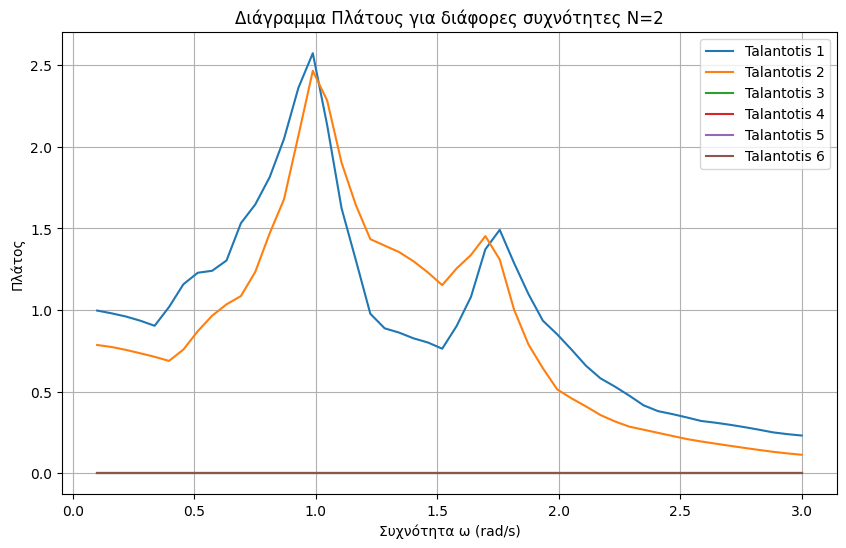

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  
k = 1.0  
b = 0.2  
F0 = 1.0  
omegas = np.linspace(0.1, 3.0, 50)  
t_span = (0, 200)  
initial_conditions = [0.0, 0.0] * 6  

def equations(t, y, omega):
    dydt = np.zeros_like(y)
    for i in range(2):
        x_i = y[2*i]
        v_i = y[2*i + 1]
        if i == 0:
            x_prev = 0  
        else:
            x_prev = y[2*(i-1)]
        
        if i == 5:
            x_next = 0
        else:
            x_next = y[2*(i+1)]
        
        dydt[2*i] = v_i
        force = -k * (2 * x_i - x_prev - x_next) - b * v_i
        if i == 0:
            force += F0 * np.cos(omega * t)
        dydt[2*i + 1] = force / m
    return dydt

amplitudes = np.zeros((6, len(omegas)))

for j, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    y = sol.sol(t)
    for i in range(6):
        amplitudes[i, j] = np.max(np.abs(y[2*i]))  

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(omegas, amplitudes[i], label=f'Talantotis {i+1}')
plt.xlabel('Συχνότητα ω (rad/s)')
plt.ylabel('Πλάτος')
plt.title('Διάγραμμα Πλάτους για διάφορες συχνότητες Ν=2')
plt.legend()
plt.grid(True)
plt.show()

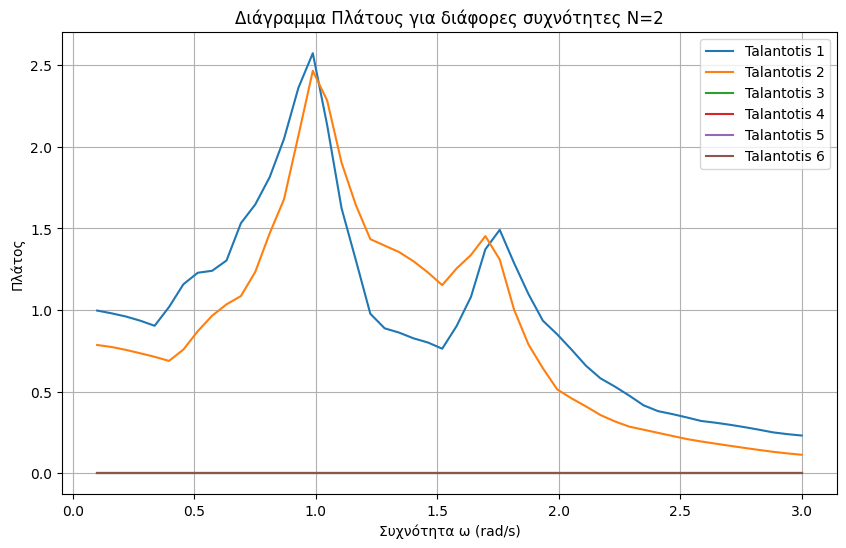

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  
k = 1.0  
b = 0.2  
F0 = 1.0  
omegas = np.linspace(0.1, 3.0, 50)  
t_span = (0, 200)  
initial_conditions = [0.0, 0.0] * 6 

def equations(t, y, omega):
    dydt = np.zeros_like(y)
    for i in range(2):
        x_i = y[2*i]
        v_i = y[2*i + 1]
        if i == 0:
            x_prev = 0  
        else:
            x_prev = y[2*(i-1)]
        
        if i == 5:
            x_next = 0  
        else:
            x_next = y[2*(i+1)]
        
        dydt[2*i] = v_i
        force = -k * (2 * x_i - x_prev - x_next) - b * v_i
        if i == 0:
            force += F0 * np.cos(omega * t)
        dydt[2*i + 1] = force / m
    return dydt

amplitudes = np.zeros((6, len(omegas)))

for j, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    y = sol.sol(t)
    for i in range(6):
        amplitudes[i, j] = np.max(np.abs(y[2*i]))  

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(omegas, amplitudes[i], label=f'Talantotis {i+1}')
plt.xlabel('Συχνότητα ω (rad/s)')
plt.ylabel('Πλάτος')
plt.title('Διάγραμμα Πλάτους για διάφορες συχνότητες Ν=2')
plt.legend()
plt.grid(True)
plt.show()


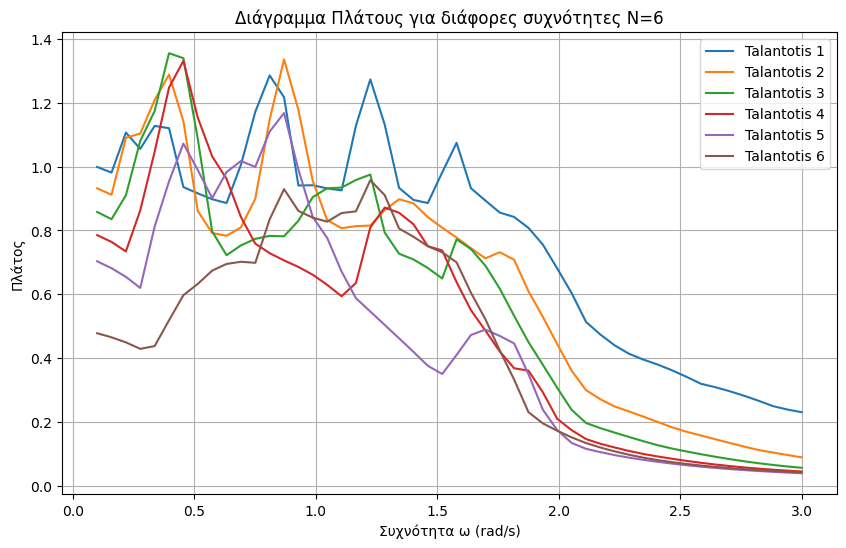

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  
k = 1.0  
b = 0.2  
F0 = 1.0  
omegas = np.linspace(0.1, 3.0, 50)  
t_span = (0, 200)  
initial_conditions = [0.0, 0.0] * 6  

def equations(t, y, omega):
    dydt = np.zeros_like(y)
    for i in range(6):
        x_i = y[2*i]
        v_i = y[2*i + 1]
        if i == 0:
            x_prev = 0  
        else:
            x_prev = y[2*(i-1)]
        
        if i == 5:
            x_next = 0  
        else:
            x_next = y[2*(i+1)]
        
        dydt[2*i] = v_i
        force = -k * (2 * x_i - x_prev - x_next) - b * v_i
        if i == 0:
            force += F0 * np.cos(omega * t)
        dydt[2*i + 1] = force / m
    return dydt

amplitudes = np.zeros((6, len(omegas)))

for j, omega in enumerate(omegas):
    sol = solve_ivp(equations, t_span, initial_conditions, args=(omega,), dense_output=True)
    t = np.linspace(*t_span, 1000)
    y = sol.sol(t)
    for i in range(6):
        amplitudes[i, j] = np.max(np.abs(y[2*i]))  

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(omegas, amplitudes[i], label=f'Talantotis {i+1}')
plt.xlabel('Συχνότητα ω (rad/s)')
plt.ylabel('Πλάτος')
plt.title('Διάγραμμα Πλάτους για διάφορες συχνότητες Ν=6')
plt.legend()
plt.grid(True)
plt.show()


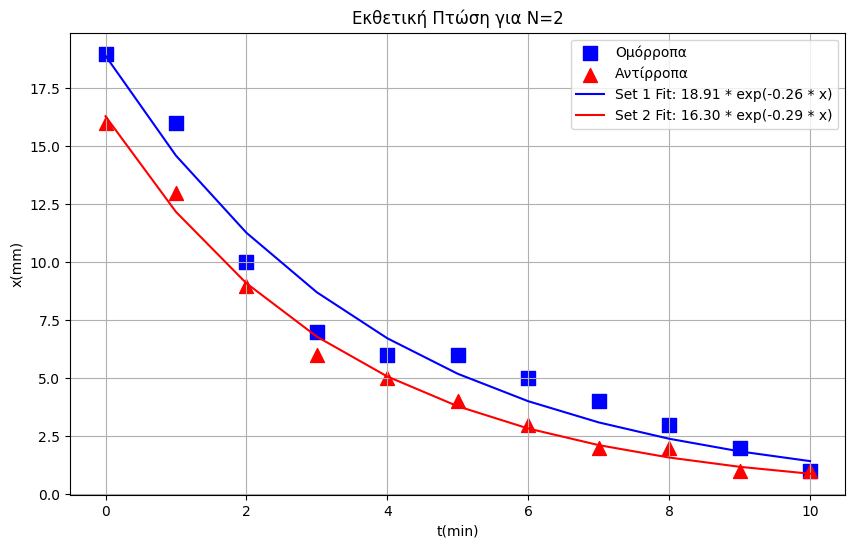

(array([18.91216649, -0.25851844]), array([16.30173468, -0.29168286]))

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y1_data = np.array([19, 16, 10, 7, 6, 6, 5, 4, 3, 2, 1])
y2_data = np.array([16, 13, 9, 6, 5, 4, 3, 2, 2, 1, 1])

def exp_func(x, a, b):
    return a * np.exp(b * x)

params1, _ = curve_fit(exp_func, x_data, y1_data)
params2, _ = curve_fit(exp_func, x_data, y2_data)

y1_fit = exp_func(x_data, *params1)
y2_fit = exp_func(x_data, *params2)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y1_data, label='Ομόρροπα', color='blue', s=100, marker='s')
plt.scatter(x_data, y2_data, label='Αντίρροπα', color='red', s=100, marker='^')
plt.plot(x_data, y1_fit, label=f'Set 1 Fit: {params1[0]:.2f} * exp({params1[1]:.2f} * x)', color='blue')
plt.plot(x_data, y2_fit, label=f'Set 2 Fit: {params2[0]:.2f} * exp({params2[1]:.2f} * x)', color='red')
plt.xlabel('t(min)')
plt.ylabel('x(mm)')
plt.title('Εκθετική Πτώση για Ν=2')
plt.legend()
plt.grid(True)
plt.show()

params1, params2